<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/Anamoly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import scipy.stats
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

Import dataset

In [ ]:
mat = loadmat("ex8data1.mat")
X = mat["X"]

Visualize data

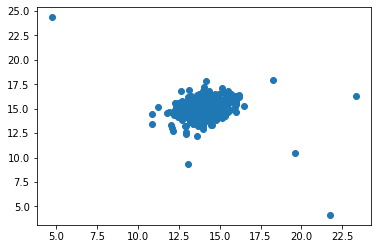

In [ ]:
plt.scatter(X[:,0], X[:,1])

Check if data is normally distributed

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  1.,  1.,  4.,  9., 15., 32., 38., 48., 51.,
        33., 26., 20., 12.,  9.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 4.75261282,  5.12435792,  5.49610301,  5.86784811,  6.2395932 ,
         6.61133829,  6.98308339,  7.35482848,  7.72657358,  8.09831867,
         8.47006376,  8.84180886,  9.21355395,  9.58529905,  9.95704414,
        10.32878923, 10.70053433, 11.07227942, 11.44402452, 11.81576961,
        12.1875147 , 12.5592598 , 12.93100489, 13.30274999, 13.67449508,
        14.04624018, 14.41798527, 14.78973036, 15.16147546, 15.53322055,
        15.90496565, 16.27671074, 16.64845583, 17.02020093, 17.39194602,
        17.76369112, 18.13543621, 18.5071813 , 18.8789264 , 19.25067149,
        19.62241659, 19.99416168, 20.36590677, 20.73765187, 21.10939696,
        21.48114206, 21.85288715, 22.22463225, 22.59637734,

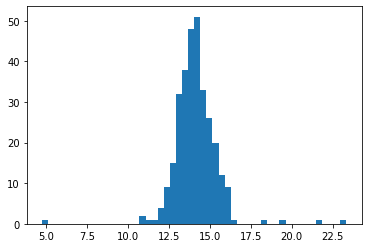

In [ ]:
plt.hist(X[:,0], bins=50) #Both approxiately follows normal distribution

Train the model

In [ ]:
X = np.array(X)
mean_arr = X.mean(axis=0).reshape(2, 1)
var_arr = X.var(axis=0).reshape(2,1)
scipy.stats.norm.cdf(np.array([5,25]).reshape(2,1),loc=mean_arr,scale=var_arr)

Visualizing countours

In [ ]:
# #Minimum and maximum for feature 1
# x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
# #Minimum and maximum for feature 2
# y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
# #Create meshgrid which gives us 2 matrices to have cross product of feature 1 and feature 2. h is a step size
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
# #Create an input array which contains the prediction for all the xx and yy combinations
# input_array = np.array([xx.ravel(), yy.ravel()]).T
# Z_temp = scipy.stats.norm.cdf(input_array.reshape(2,-1),loc=mean_arr,scale=var_arr)
# Z = np.apply_along_axis(lambda X : X[0]*X[1], axis=0, arr = Z_temp)
# Z = Z.reshape(xx.shape)
# Z[90][101]
mean_arr[0][0]


14.112225783945592

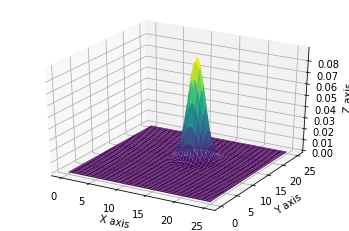

In [ ]:
#Parameters to set
mu_x = mean_arr[0][0]
variance_x = var_arr[0][0]

mu_y = mean_arr[1][0]
variance_y = var_arr[1][0]

#Create grid and multivariate normal
x = np.linspace(0,25,100)
y = np.linspace(0,25,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Choose correct epsilon

In [ ]:
Xval = mat["Xval"]
yval = mat["yval"]

pVector = rv.pdf(Xval)
pVector.reshape(len(Xval), 1)
yval.shape

Function to get best epsilon and corresponding F-1 score

In [ ]:
def selectThreshold(pVector, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    min_p = pVector.min()
    max_p = pVector.max()
    stepsize = (max_p  - min_p) / 1000
    epsilons = np.arange(min_p, max_p, stepsize)
    for epsilon in np.nditer(epsilons):
        prediction = pVector < epsilon
        f1 = f1_score(yval, prediction)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

In [ ]:
selectThreshold(pVector, yval)

(array(8.99085278e-05), 0.8750000000000001)